F : F로 부터 추출된 값 9개
[[ 0.20787958  0.30786397  0.45593813]
 [ 0.67523191  1.          1.48097267]
 [ 2.19328005  3.24818781  4.81047738]]

G : tau에 -를 곱하여 수학적으로 함수를 뒤집고 t만큼 시프트 시킨 G로 부터 추출된 값 9개
[[ 5.87553034  3.96734555  2.6788783 ]
 [ 1.8088641   1.22140276  0.82473011]
 [ 0.55688409  0.3760259   0.25390469]]

이제 함수에 -를 곱해서 뒤집는 것 대신 값을 뽑아낸 상태에서 -를 곱해서 뒤집는것과
같은 효과를 내보겠음
H : F를 뒤집지는 않고 F함수에서 t만큼 시프트 시킨 함수의 값 9개
[[ 0.25390469  0.3760259   0.55688409]
 [ 0.82473011  1.22140276  1.8088641 ]
 [ 2.6788783   3.96734555  5.87553034]]

J : H를 rot180시켜서 함수에 -를 곱해서 뒤집는것과 같은 효과를 냄
[[ 5.87553034  3.96734555  2.6788783 ]
 [ 1.8088641   1.22140276  0.82473011]
 [ 0.55688409  0.3760259   0.25390469]]

J와 G는 똑같음. 즉, 컨벌루션은 F와 J 또는 G를 다 곱해서 싹 더하는것


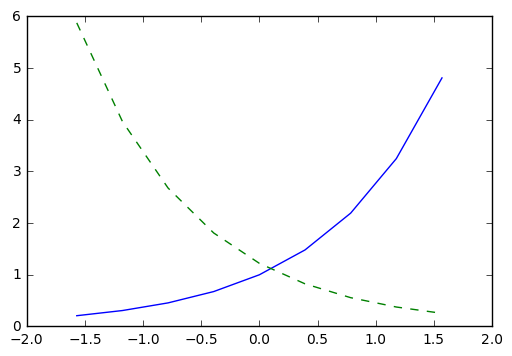

convolution(F, G) value = 10.99262482344153
convolution(F, J) value = 10.992624823441528
위 두 결과는 같다. 따라서 행렬을 180도 돌리는 것은 수학적으로 함수에 -곱해서 뒤집는것과 동치다


In [51]:
import numpy as np
import matplotlib.pyplot as plt

tau = np.linspace(-np.pi/2, np.pi/2, 9, endpoint=True)
tau_33 = tau.reshape((3,3))
#print(tau2)


t = 0.2 # F*G(0.4) 의 값을 구하자.
F = np.exp(tau)
F_33 = np.exp(tau_33)
print('F : F로 부터 추출된 값 9개')
print(F_33)

print('')

print('G : tau에 -를 곱하여 수학적으로 함수를 뒤집고 t만큼 시프트 시킨 G로 부터 추출된 값 9개')
G = np.exp(-tau + t) #tau에  -를 곱해서 이미 뒤집었음
G_33 = np.exp(-tau_33 + t)
print(G_33) #이렇게 함수에 -를 곱해서 뒤집어서 값을 추출해내면

print('')

print('이제 함수에 -를 곱해서 뒤집는 것 대신 값을 뽑아낸 상태에서 -를 곱해서 뒤집는것과')
print('같은 효과를 내보겠음')

print('H : F를 뒤집지는 않고 F함수에서 t만큼 시프트 시킨 함수의 값 9개')
H = np.exp(tau+t)
H_33 = np.exp(tau_33+t)
print(H_33)

print('')
print('J : H를 rot180시켜서 함수에 -를 곱해서 뒤집는것과 같은 효과를 냄')
J_33 = np.rot90(H_33,2)
print(J_33)

print('')

print('J와 G는 똑같음. 즉, 컨벌루션은 F와 J 또는 G를 다 곱해서 싹 더하는것')

#두 결과는 같다.
#(f*g)(t) = ∫-∞~∞ f(𝛕)g(t-𝛕)d𝛕
#(f*g)(m) = 𝚺 f(n)g(m-n)
conv_FG = sum(F*G) #F, G는 일차원 어레이라 그냥 곱하고 다 더하면 됨
conv_FJ = np.multiply(F_33, J_33).sum() #F_33, J_33은 3x3행렬이라 그냥 곱하면 행렬곱이 되버림 그래서 multiply함


plt.plot(tau,F, '-')
plt.plot(tau,G, '--')
plt.show()

print('convolution(F, G) value = {0}'.format(conv_FG))
print('convolution(F, J) value = {0}'.format(conv_FJ))

print('위 두 결과는 같다. 따라서 행렬을 180도 돌리는 것은 수학적으로 함수에 -곱해서 뒤집는것과 동치다')

